In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
df =pd.read_csv('Company_Data.csv')

In [3]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:

label_encoder = preprocessing.LabelEncoder()
df['Sales']= label_encoder.fit_transform(df['Sales'])

In [5]:
label_encoder = preprocessing.LabelEncoder()
df['US']= label_encoder.fit_transform(df['US'])

In [6]:
label_encoder = preprocessing.LabelEncoder()
df['ShelveLoc']= label_encoder.fit_transform(df['ShelveLoc'])

In [7]:
label_encoder = preprocessing.LabelEncoder()
df['Urban']= label_encoder.fit_transform(df['Urban'])

In [8]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,255,138,73,11,276,120,0,42,17,1,1
1,297,111,48,16,260,83,1,65,10,1,1
2,267,113,35,10,269,80,2,59,12,1,1
3,158,117,100,4,466,97,2,55,14,1,1
4,37,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,320,138,108,17,203,128,1,33,14,1,1
396,114,139,23,3,37,120,2,55,11,0,1
397,159,162,26,12,368,159,2,40,18,1,1
398,106,100,79,7,284,95,0,50,12,1,1


In [21]:
x=df.iloc[:,1:10]
y=df['US']

In [22]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban
0,138,73,11,276,120,0,42,17,1
1,111,48,16,260,83,1,65,10,1
2,113,35,10,269,80,2,59,12,1
3,117,100,4,466,97,2,55,14,1
4,141,64,3,340,128,0,38,13,1
...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1
396,139,23,3,37,120,2,55,11,0
397,162,26,12,368,159,2,40,18,1
398,100,79,7,284,95,0,50,12,1


In [23]:
y

0      1
1      1
2      1
3      1
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: US, Length: 400, dtype: int32

In [24]:

df['US'].unique()

array([1, 0])

In [25]:
df.Sales.value_counts()

183    4
142    3
243    3
117    3
135    3
      ..
221    1
222    1
224    1
225    1
0      1
Name: Sales, Length: 336, dtype: int64

In [26]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [39]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=60)

In [40]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=8)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

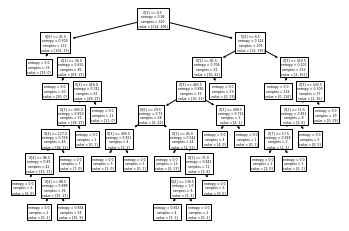

In [41]:
#PLot the decision tree
tree.plot_tree(model);


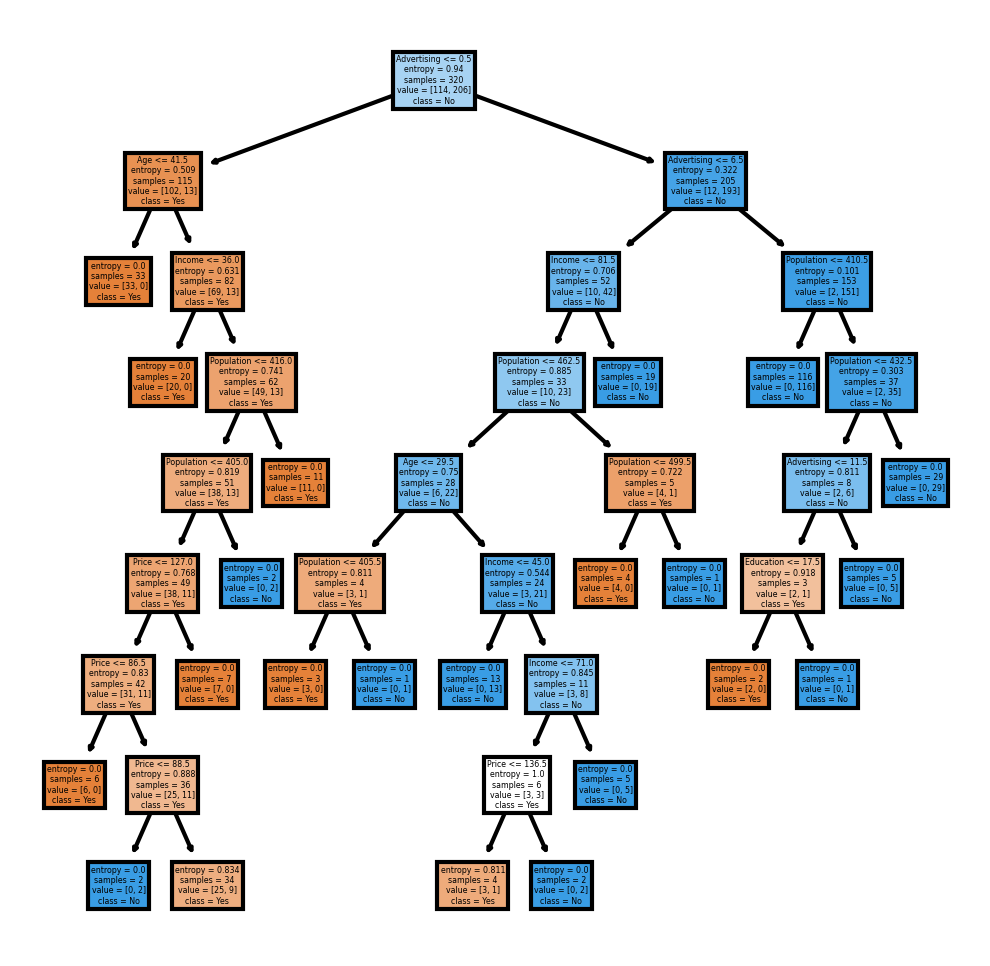

In [42]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban']
cn=['Yes','No']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [43]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    44
0    36
dtype: int64

In [44]:
preds

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1])

In [45]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
US,,
0,26,2
1,10,42


In [46]:
# Accuracy 
np.mean(preds==y_test)

0.85

# Building Decision Tree Classifier (CART) using Gini Criteria


In [47]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=5)

In [48]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [49]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.85

# Data set fraud

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [51]:
df =pd.read_csv('Fraud_check (2).csv')

In [52]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [53]:
#Complete  dataset
label_encoder = preprocessing.LabelEncoder()
df['Urban']= label_encoder.fit_transform(df['Urban']) 


In [54]:
label_encoder = preprocessing.LabelEncoder()
df['Undergrad']= label_encoder.fit_transform(df['Undergrad']) 

In [55]:
label_encoder = preprocessing.LabelEncoder()
df['Marital.Status']= label_encoder.fit_transform(df['Marital.Status']) 

In [56]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [57]:
x=df.iloc[:,1:5]
y=df['Urban']

In [58]:
x

,Marital.Status,Taxable.Income,City.Population,Work.Experience
0,2,68833,50047,10
1,0,33700,134075,18
2,1,36925,160205,30
3,2,50190,193264,15
4,1,81002,27533,28
...,...,...,...,...
595,0,76340,39492,7
596,0,69967,55369,2
597,0,47334,154058,0
598,1,98592,180083,17


In [59]:
y

0      1
1      1
2      1
3      1
4      0
      ..
595    1
596    1
597    1
598    0
599    0
Name: Urban, Length: 600, dtype: int32

In [60]:
df['Urban'].unique()

array([1, 0])

In [61]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=100)

# Building Decision Tree Classifier using Entropy Criteria¶

In [62]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=6)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

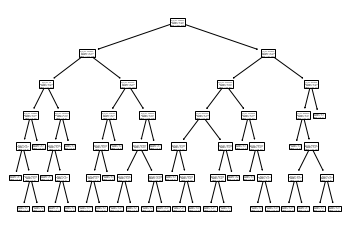

In [63]:
#PLot the decision tree
tree.plot_tree(model);

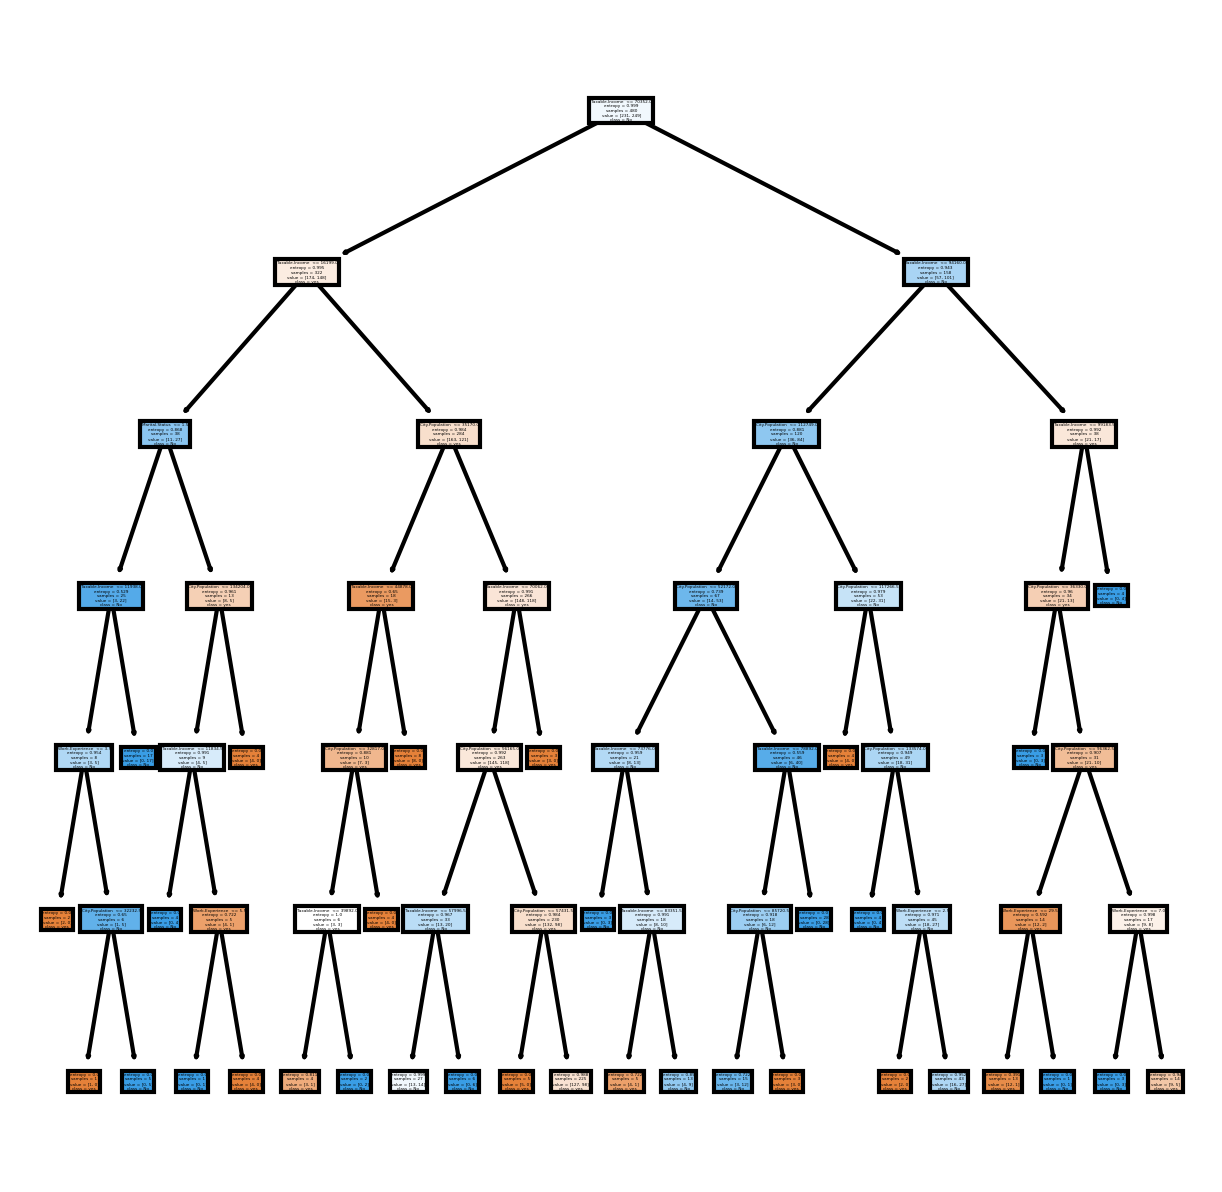

In [64]:
fn=['Marital.Status ','Taxable.Income ','City.Population ','Work.Experience ']
cn=['yes','No']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [65]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0    75
1    45
dtype: int64

In [66]:
preds

array([0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1])

In [67]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Urban,,
0,40,27
1,35,18


In [68]:
# Accuracy 
np.mean(preds==y_test)

0.48333333333333334

# Building Decision Tree Classifier (CART) using Gini Criteria¶


In [69]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [70]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [71]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.48333333333333334